In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#cargamos el contenido de nuestro Google Drive

Mounted at /content/drive


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
#cargamos el archivo que deseamos manipular

inmuebles.head()
#inmuebles.head() permite ver las primeras 5 filas

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
#renombramos las columnas como anteriormente se realizó
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns = columnas)

In [ ]:
#Obtenemos una muestra de la base de datos
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
4281,Apartamento,Apartamento en venta en Usaquén,2,2,58,Usaquén,Usaquén,$ 330.000.000
8301,Apartamento,Apartamento en venta en Barrancas,3,2,75,Barrancas,San Cristóbal Norte,$ 420.000.000
107,Oficina/Consultorio,Oficina/Consultorio en venta en Ciudad Salitre,4,2,200,Ciudad Salitre,Ciudad Salitre Oriental,$ 2.000.000.000
6124,Apartamento,Apartamento en venta en Cedritos,2,2,63,Cedritos,Usaquén,$ 360.000.000
6397,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 136.000.000


In [ ]:
#Vemos la info de la base
inmuebles.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
#Obtenemos el tipo de dato a manipular, en este caso tenemos un String
type(inmuebles.Valor[0])

str

In [ ]:
#Hacemos una operación entre diferentes valores, para ver que ocurre al sumar Strings
#De igual manera para ejemplificar que aunque el dato se muestre numerico, dicho dato está guardado como string en la base de datos
inmuebles.Valor[0]+inmuebles.Valor[2]+inmuebles.Valor[:5]

0      $ 360.000.000$ 1.120.000.000$ 360.000.000
1      $ 360.000.000$ 1.120.000.000$ 670.000.000
2    $ 360.000.000$ 1.120.000.000$ 1.120.000.000
3      $ 360.000.000$ 1.120.000.000$ 890.000.000
4      $ 360.000.000$ 1.120.000.000$ 970.000.000
Name: Valor, dtype: object

In [ ]:
#Separamos los valores del String, en este caso, el signo ($) y el valor (360.000.000)
inmuebles.Valor[0].split()

['$', '360.000.000']

In [ ]:
#Separamos toda la columna Valor
#Al agregar str nos vuelve el dato en forma de lista (panda.series)

inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [ ]:
#Con el parametro (expand=True) nos devuelve un formato Dataframe de 2 columnas
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [ ]:
#Creamos una nueva variable a la cual asignaremos el nuevo dataframe obtenido anteriormente
valor = inmuebles.Valor.str.split(expand=True);

#Agregamos dos columnas para visualizar por separado los datos de las 2 columnas del datafram
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

#Obtenemos una muestra para visualizar las nuevas columnas de la base de datos
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
6867,Apartamento,Apartamento en venta en Cedritos,3,1,61,Cedritos,Usaquén,$ 195.000.000,$,195.000.000,195.00
4199,Apartamento,Apartamento en venta en Quinta Paredes,2,3,153,Quinta Paredes,Teusaquillo,$ 739.000.000,$,739.000.000,739.00
3092,Apartamento,Apartamento en venta en Modelia,3,3,108,Modelia,Fontibón,$ 670.000.000,$,670.000.000,670.00
3348,Apartamento,Apartamento en venta en Timiza,3,1,46,Timiza,Timiza,$ 147.000.000,$,147.000.000,147.00
2237,Apartamento,Apartamento en venta en Barrios Unidos,3,2,81,Barrios Unidos,Los Andes,$ 332.500.000,$,332.500.000,332.50
3865,Apartamento,Apartamento en venta en Chico Reservado,3,3,120,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 750.000.000,$,750.000.000,750.00
1175,Apartamento,Apartamento en venta en Chapinero,3,2,131,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 825.000.000,$,825.000.000,825.00
9506,Apartamento,Apartamento en venta en Chico Reservado,3,4,390,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 3.200.000.000,$,3.200.000.000,3200.00
1454,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 310.000.000,$,310.000.000,310.00
6900,Apartamento,Apartamento en venta en Cedritos,3,2,80,Cedritos,Usaquén,$ 330.000.000,$,330.000.000,330.00


In [ ]:
#Comprobamos con .info() que aun no son valores númericos
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
#Dado los puntos de separación de millares en los valores del precio, hay que realizar un tratamiento
#de estos valores haciendo uso de replace
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [ ]:
#Observamos el dataset para visualizar las dos columnas con el cambio realizado anteriormente
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
#Convertimos el tipo de dato string a númerico
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

#Observamos que este dato ahora sea numerico
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
#Podemos obtener valores estadisticos con la funcion .describe()
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
#Podemos visualizar los datos de manera más amigable sin ver tantos numeros como anteriormete
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
#Podemos consultar la información de acuerdo a un dato con .loc[]
inmuebles.loc[inmuebles.Habitaciones==110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [ ]:
inmuebles.loc[inmuebles.Area==2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

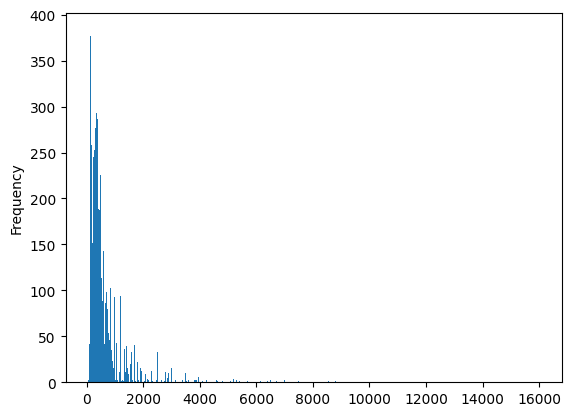

In [ ]:
#Obtenemos una grafica de los precios de los inmuebles
inmuebles['Precio_Millon'].plot.hist(bins=1000)

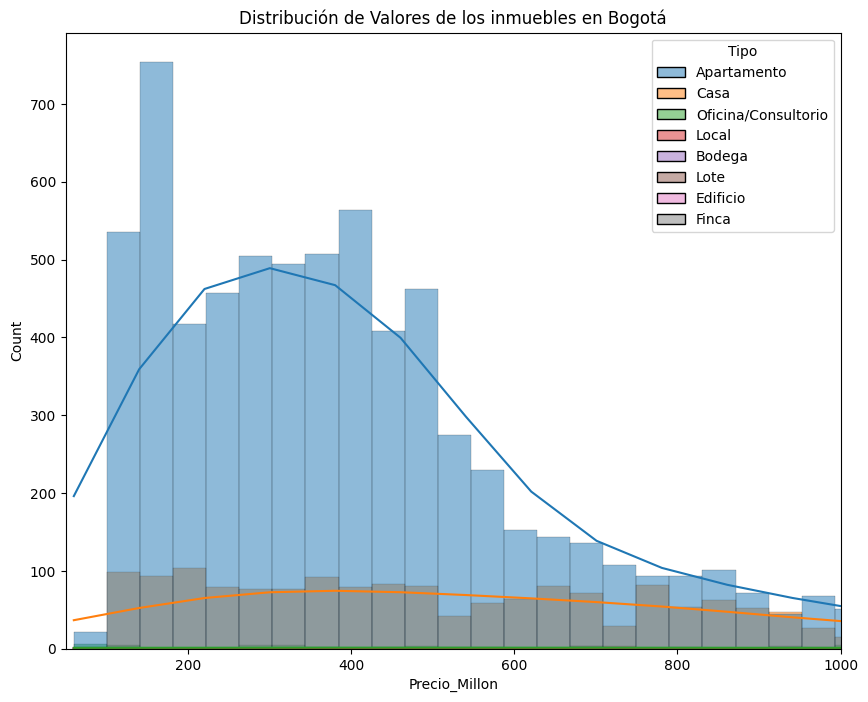

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos un lienzo para crear una grafica posteriormente
plt.figure(figsize=(10,8))

#Realizamos la grafica
#Podemos observar la curva de densidad con kde=True
#De igual manera, podemos observar otros datos mediante hue='<datos a observar>'
grafica = sns.histplot(data=inmuebles,x='Precio_Millon',kde=True,hue='Tipo')

#Le ponemos titulo a la grafica
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')

#Establecemos limites a los ejes para observar mejor la informacion en el histograma
plt.xlim(50,1000)

#Hacemos menor el limite para observar los demas tipos de inmuebles que se encuentran en el histograma
#plt.ylim(0,20)

#Mostramos la grafica
plt.show()

#Podemos guardar la grafica con .savefig()
plt.savefig('/content/drive/MyDrive/grafica.png',format='png')

#**Desafíos del Aula 2**
###Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información);

###Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable..
